In [1]:
import pandas as pd

# Data Loading

In [2]:
# df = pd.read_csv("C:/Users/ayan1/OneDrive/Documents/Course/Machine Learning Using Python/Complete Machine Learning with Python/Data Files/3.Decision Trees resource files/Movie_regression.csv",header=0)
df = pd.read_csv("Movie_regression.csv",header=0)

# Missing Data Imputation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [4]:
df['Time_taken'].mean()

157.3914979757085

In [5]:
df['Time_taken'] = df['Time_taken'].fillna(df['Time_taken'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Creation of Dummy Variable

In [6]:
df =pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [7]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


# Dependent(y) and Independent(x) Variable Creation

In [8]:
x = df.loc[:,df.columns != "Collection"]
y = df['Collection']

# Train - Test Split

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Decision Tree regression model

In [10]:
from sklearn.tree import DecisionTreeRegressor

regTree = DecisionTreeRegressor(max_depth=3)
regTree.fit(x_train, y_train)

# Predict on test data
y_train_pred = regTree.predict(x_train)
y_test_pred = regTree.predict(x_test)

### Model Performance

In [11]:
from sklearn.metrics import mean_squared_error,r2_score

print('Mean Squared Error for test data: ',mean_squared_error(y_test, y_test_pred))
print('\n R2 Score for training data: ',r2_score(y_train, y_train_pred))
print('\n R2 Score for test data: ',r2_score(y_test, y_test_pred))

Mean Squared Error for test data:  99983788.27972667

 R2 Score for training data:  0.8364651040556869

 R2 Score for test data:  0.6894186462226066


### Ploting Decision Tree

In [12]:
# pip install pydotplus

In [18]:
from sklearn import tree
from IPython.display import Image
import pydotplus


dot_data = tree.export_graphviz(regTree,out_file = None,feature_names= x_train.columns, filled = True)

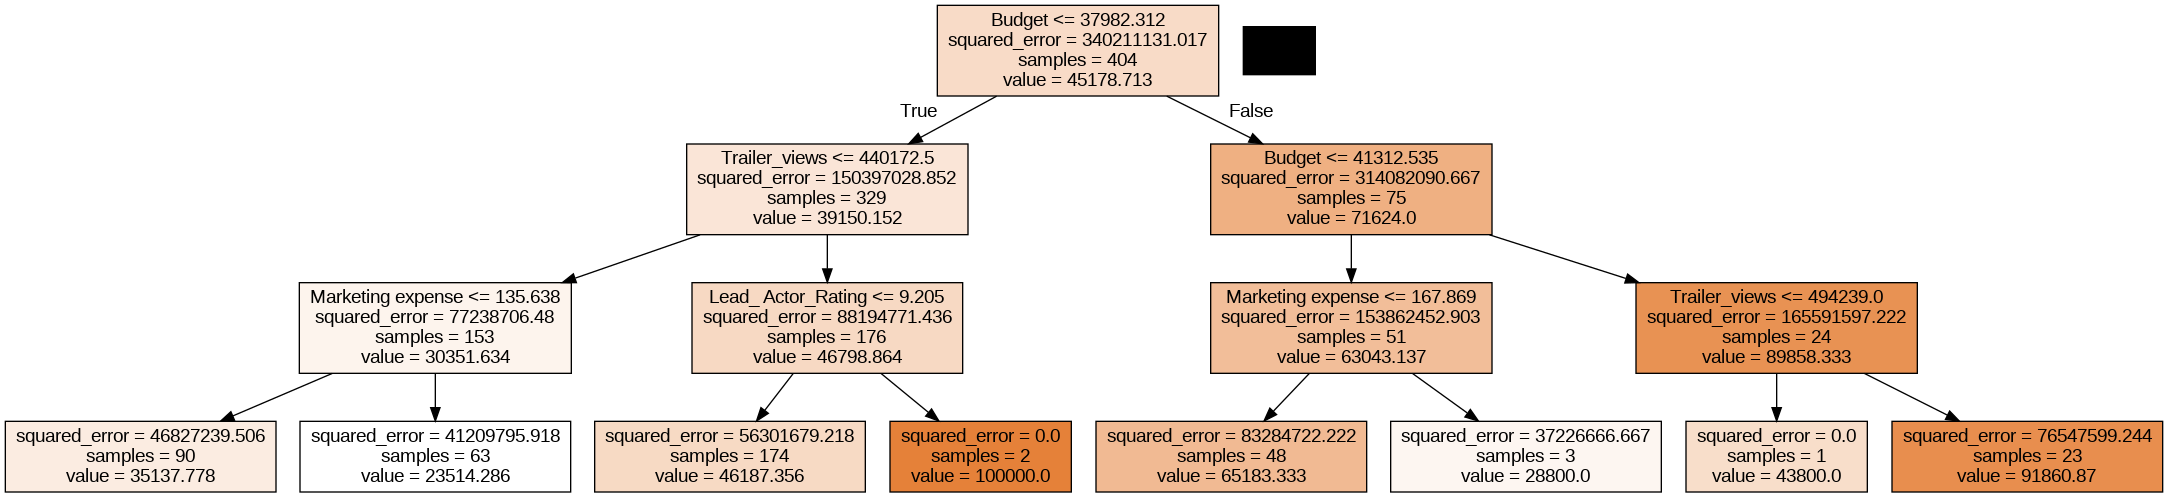

In [19]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth

### Maximum number of levels in tree

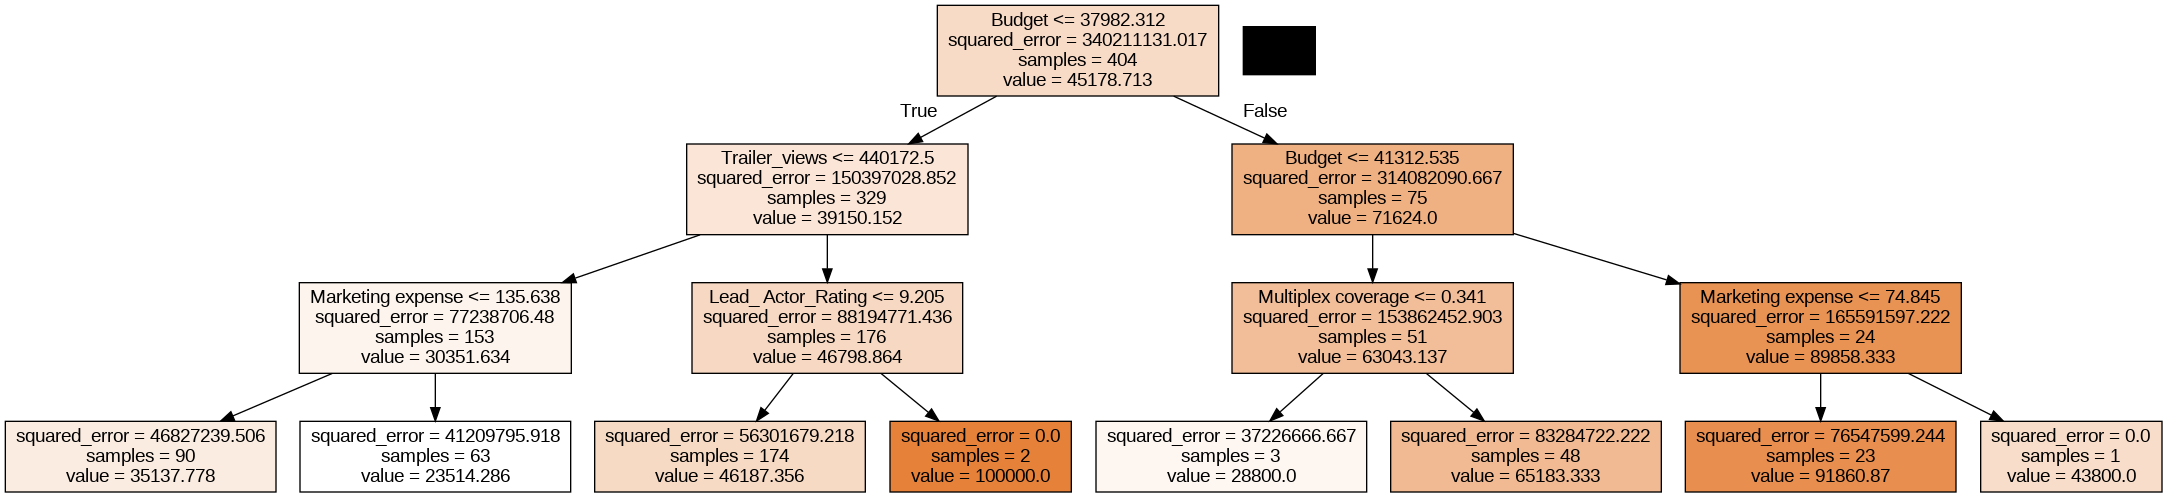

In [15]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(x_train, y_train)
dot_data = tree.export_graphviz(regtree1, out_file=None,feature_names= x_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

### Minimum observations at internal node

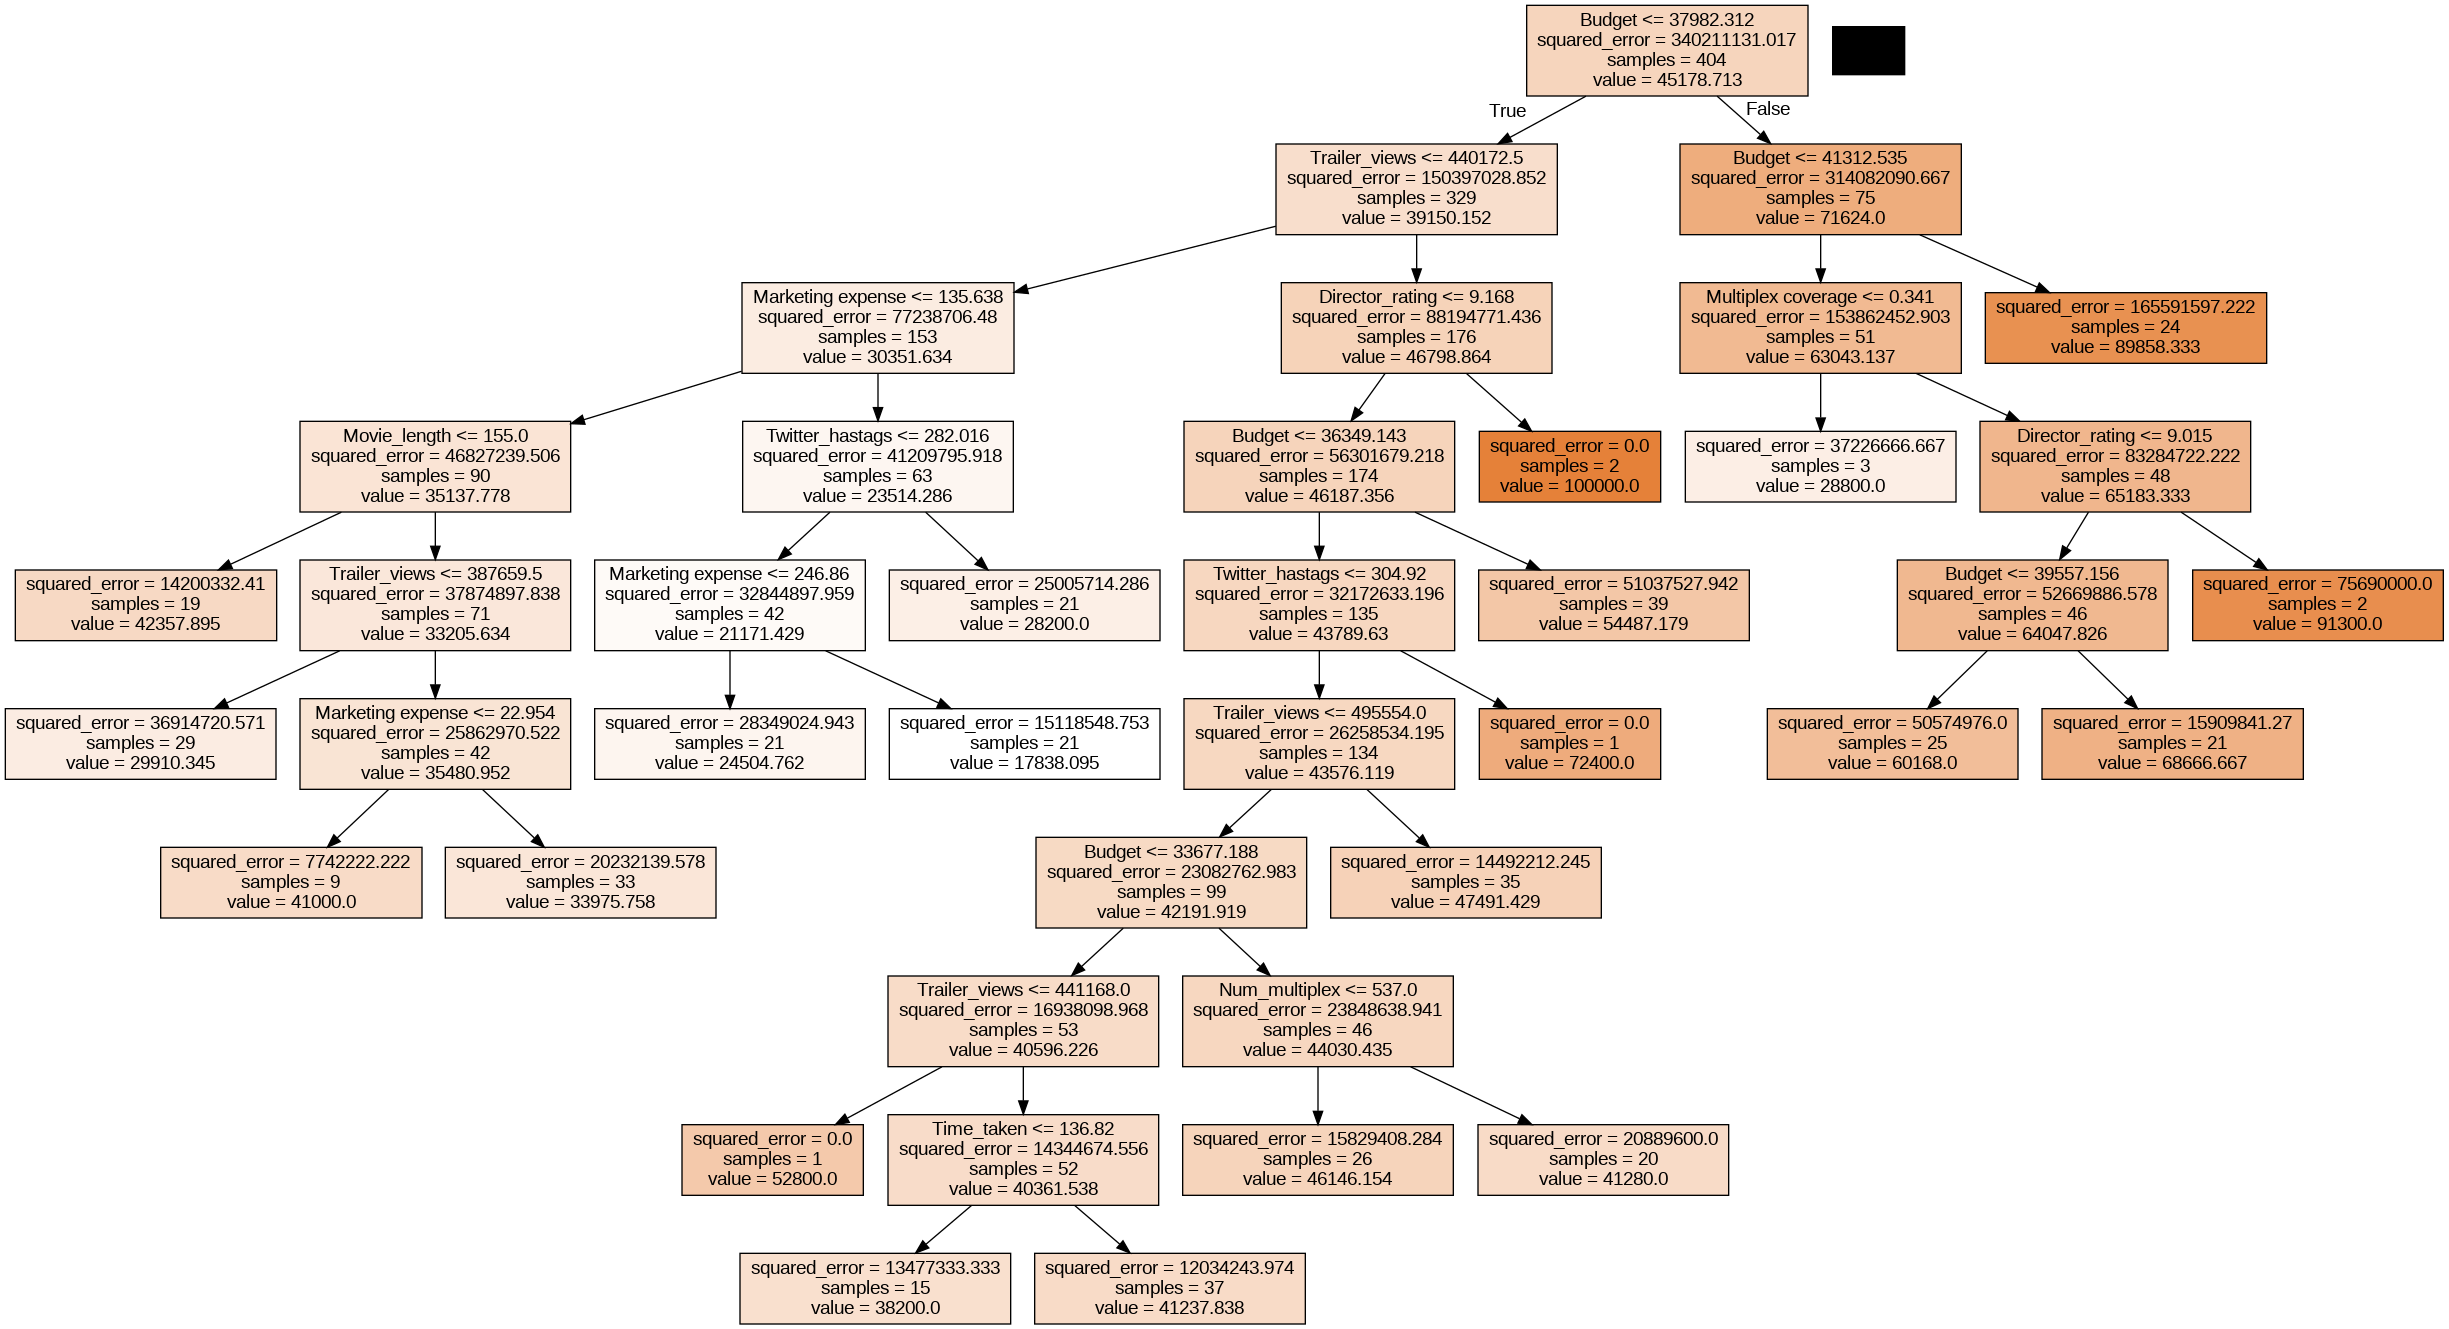

In [16]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

### Minimum observations at leaf node

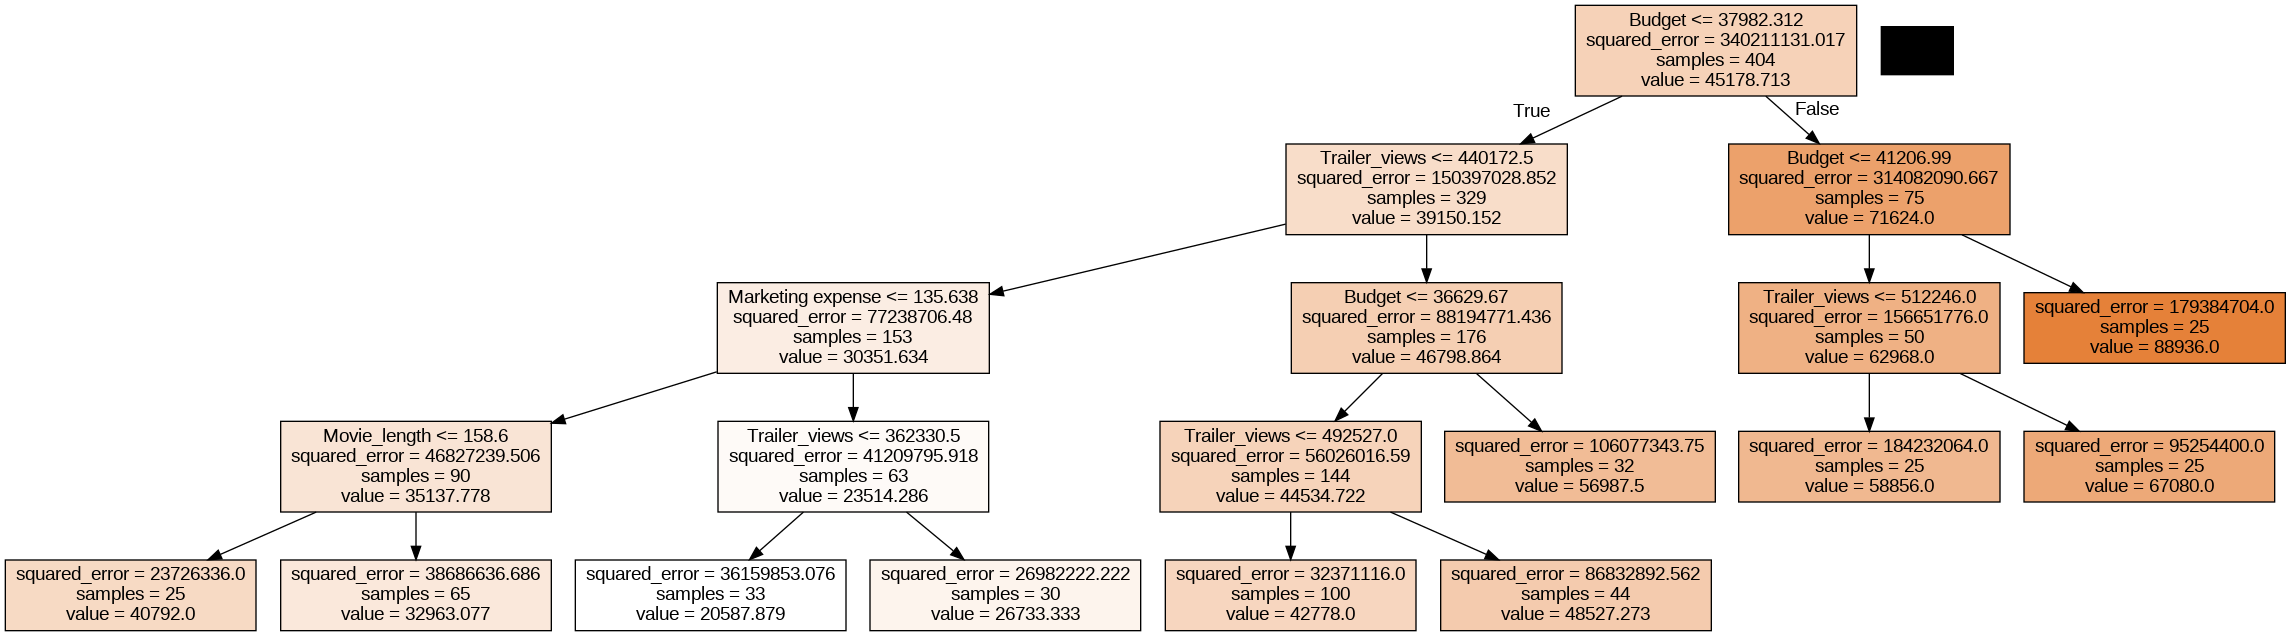

In [21]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth=4)
regtree3.fit(x_train, y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None,feature_names= x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())